In [15]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


In [16]:
def gini(x):
    # Mean absolute difference
#     x = x[np.logical_not(np.isnan(x))]
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(np.abs(x))
    # Gini coefficient
    g = 0.5 * rmad
    return 1-g

In [17]:
def getAgentDf(experiment):
    '''
    input: str type of experiment e.g a3c, cap, com etc.
    output: pd series of diversity(1-gini) value of agents at each ts
    '''
    
    file_glob = glob.iglob('./temp/run-'+experiment+'*')
    dfs = []
    for file in file_glob:
        dfs.append(pd.read_csv(file))
    full_df = pd.concat(dfs).dropna()
    
    return full_df

def getGini(concatDf):
    diversity = concatDf.groupby('Step')['Value'].apply(gini) 
    return diversity


In [4]:
getAgentDiv('cap').plot(label='Capitalism')
getAgentDiv('a3c').plot(label='A3C')

plt.xlim(120000, 500000)
plt.ylim(0.8, 1.0)
plt.legend()
plt.show()

NameError: name 'getAgentDiv' is not defined

In [24]:
# file_glob = glob.iglob('./temp/run-'+'pre-train'+'*')
!ls ./temp/

run-pre-train_vary_agents_C1_H4_A3C_cleanup_env_0_2019-04-26_19-44-34tr0aqoli-tag-ray_tune_episode_reward_mean.csv
run-pre-train_vary_agents_C2_H3_A3C_cleanup_env_0_2019-04-26_19-35-12d03fgfdg-tag-ray_tune_episode_reward_mean.csv
run-pre-train_vary_agents_C3_H2_030-030_A3C_cleanup_env_0_2019-04-25_09-01-492ljbc71j-tag-ray_tune_episode_reward_mean.csv
run-pre-train_vary_agents_C4_H1_A3C_cleanup_env_0_2019-04-26_19-54-44m0hqhbb5-tag-ray_tune_episode_reward_mean.csv


In [25]:
# a3c = getAgentDf('a3c')
# com = getAgentDf('communism')
# cap = getAgentDf('capitalism')
# pre = getAgentDf('pre-train')
# run-pre-train_050-025.+agent-[2,4]*
a3c = pd.read_csv('./temp/run-pre-train_vary_agents_C1_H4_A3C_cleanup_env_0_2019-04-26_19-44-34tr0aqoli-tag-ray_tune_episode_reward_mean.csv')
com = pd.read_csv('./temp/run-pre-train_vary_agents_C2_H3_A3C_cleanup_env_0_2019-04-26_19-35-12d03fgfdg-tag-ray_tune_episode_reward_mean.csv')
pre = pd.read_csv('./temp/run-pre-train_vary_agents_C3_H2_030-030_A3C_cleanup_env_0_2019-04-25_09-01-492ljbc71j-tag-ray_tune_episode_reward_mean.csv')
cap = pd.read_csv('./temp/run-pre-train_vary_agents_C4_H1_A3C_cleanup_env_0_2019-04-26_19-54-44m0hqhbb5-tag-ray_tune_episode_reward_mean.csv')
# preTrainHeader = './temp/run-pre-train_050-025_A3C_cleanup_env_0_2019-04-25_23-56-04ta93vt7x-tag-ray_tune_policy_reward_mean_agent-'
# capitalismHeader = './temp/run-capitalism_050-025_A3C_cleanup_env_0_2019-04-25_07-46-56mevs3_kr-tag-ray_tune_policy_reward_mean_agent-'

# preCleaners = []
# capCleaners = []
# for i in range(0,5):
#     print (i)
#     preCleaners.append(pd.read_csv(capitalismHeader + str(i)+'.csv'))
# #     capCleaners.append(pd.read_csv(capitalismHeader + str(i)+'.csv'))
    
# # preHarvesters = []
# # capHarvesters = []

# # for i in [1,3]:
# #     preHarvesters.append(pd.read_csv(preTrainHeader + str(i)+'.csv'))
# #     capHarvesters.append(pd.read_csv(capitalismHeader + str(i)+'.csv'))

# preC1, preH1, preC2, preH2, preC3 = preCleaners

                                


In [26]:
a3c['Step'] = a3c['Step'] - (2*(10**5))
com['Step'] = com['Step'] - (2*(10**5))
cap['Step'] = cap['Step'] - (2*(10**5))
pre['Step'] = pre['Step'] - (2*(10**5))


# preC1['Step'] = preC1['Step'] - (2*(10**5))
# preC2['Step'] = preC2['Step'] - (2*(10**5))
# preC3['Step'] = preC3['Step'] - (2*(10**5))
# preH1['Step'] = preH1['Step'] - (2*(10**5))
# preH2['Step'] = preH2['Step'] - (2*(10**5))




In [27]:
pre = pre.set_index('Step')
a3c = a3c.set_index('Step')
com = com.set_index('Step')
cap = cap.set_index('Step')

In [59]:
preC1 = preC1.set_index('Step')
preC2 = preC2.set_index('Step')
preC3 = preC3.set_index('Step')
preH1 = preH1.set_index('Step')
preH2 = preH2.set_index('Step')

In [69]:
preC1['Step'] = preC1['Value'].plot(label = 'Agent-1')
preC2['Step'] = preC2['Value'].plot(label = 'Agent-2')
preC3['Step'] = preC3['Value'].plot(label = 'Agent-3')
preH1['Step'] = preH1['Value'].plot(label = 'Agent-4')
preH2['Step'] = preH2['Value'].plot(label = 'Agent-5')

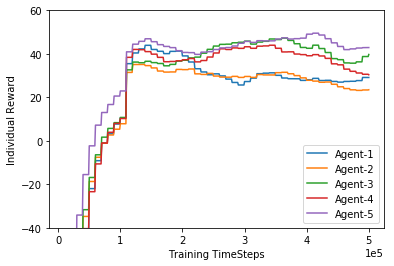

In [70]:
plt.ylim(-40,60)
plt.ticklabel_format(axis='x',style='sci',scilimits=(0,3))

# plt.axhline(0, color='black',linewidth = 0.8 )
# plt.axvline(0, color='black',linewidth = 0.8 )
plt.ylabel('Individual Reward')

plt.xlabel('Training TimeSteps')
plt.legend()
plt.savefig('./050-025/CapAgentRewards.eps', format='eps', dpi=100)
plt.show()

In [121]:
pre = pre.fillna(method='ffill')
a3c = a3c.fillna(method='ffill')
com = com.fillna(method='ffill')
cap = cap.fillna(method='ffill')

In [520]:
a3c = getGini(a3c)
pre = getGini(pre)
com = getGini(com)
cap = getGini(cap)

In [95]:
pre

Wall time       Value
Step                             
-198000  1.556306e+09 -671.000000
-197000  1.556306e+09 -671.000000
-196000  1.556306e+09 -161.975006
-195000  1.556306e+09 -161.975006
-194000  1.556306e+09  -26.733334
-193000  1.556306e+09  -26.733334
-192000  1.556306e+09   30.587500
-191000  1.556306e+09   30.587500
-190000  1.556306e+09  115.320000
-189000  1.556306e+09  115.320000
-188000  1.556306e+09  169.975006
-187000  1.556306e+09  169.975006
-186000  1.556306e+09  184.864288
-185000  1.556306e+09  184.864288
-184000  1.556306e+09  209.731247
-183000  1.556306e+09  209.731247
-182000  1.556307e+09  238.949997
-181000  1.556307e+09  238.949997
-180000  1.556307e+09  250.514999
-179000  1.556307e+09  250.514999
-178000  1.556307e+09  286.649994
-177000  1.556307e+09  286.649994
-176000  1.556307e+09  299.658325
-175000  1.556307e+09  299.658325
-174000  1.556307e+09  297.549988
-173000  1.556307e+09  297.549988
-172000  1.556307e+09  303.907135
-171000  1.556307e+09  303.907135
-170000  1.556307e+09  332.003326
-169000  1.556307e+09  332.003326
...               ...         ...
 471000  1.556211e+09  217.324997
 472000  1.556211e+09  218.065002
 473000  1.556211e+09  218.994995
 474000  1.556211e+09  220.294998
 475000  1.556211e+09  220.494995
 476000  1.556211e+09  220.854996
 477000  1.556211e+09  221.580002
 478000  1.556211e+09  222.550003
 479000  1.556211e+09  222.669998
 480000  1.556211e+09  222.580002
 481000  1.556211e+09  223.190002
 482000  1.556211e+09  223.320007
 483000  1.556211e+09  224.050003
 484000  1.556211e+09  225.130005
 485000  1.556211e+09  225.509995
 486000  1.556211e+09  227.119995
 487000  1.556211e+09  228.210007
 488000  1.556211e+09  228.110001
 489000  1.556211e+09  227.289993
 490000  1.556211e+09  227.100006
 491000  1.556211e+09  226.880005
 492000  1.556211e+09  226.750000
 493000  1.556212e+09  225.860001
 494000  1.556212e+09  225.610001
 495000  1.556212e+09  223.949997
 496000  1.556212e+09  223.139999
 497000  1.556212e+09  222.630005
 498000  1.556212e+09  221.699997
 499000  1.556212e+09  221.384995
 500000  1.556212e+09  220.445007

[1969 rows x 2 columns]

In [28]:
# a3c = getAgentDf('pre-train_vary_window_1000')
# com = getAgentDf('pre-train_vary_window_100')
# pre = getAgentDf('pre-train_vary_window_10')
# cap = getAgentDf('pre-train_vary_window_1')

# a3c = pd.read_csv('./temp/run-pre-train_vary_agents_C1_H4_A3C_cleanup_env_0_2019-04-26_19-44-34tr0aqoli-tag-ray_tune_episode_reward_mean.csv')
# com = pd.read_csv('./temp/run-pre-train_vary_agents_C2_H3_A3C_cleanup_env_0_2019-04-26_19-35-12d03fgfdg-tag-ray_tune_episode_reward_mean.csv')
# pre = pd.read_csv('./temp/run-pre-train_vary_agents_C3_H2_030-030_A3C_cleanup_env_0_2019-04-25_09-01-492ljbc71j-tag-ray_tune_episode_reward_mean.csv')
# cap = pd.read_csv('./temp/run-pre-train_vary_agents_C4_H1_A3C_cleanup_env_0_2019-04-26_19-54-44m0hqhbb5-tag-ray_tune_episode_reward_mean.csv')

cap['Value'].plot(label = '4 Cleaners, 1 Harvester')
pre['Value'].plot(label = '3 Cleaners, 2 Harvesters')
com['Value'].plot(label = '2 Cleaners, 3 Harvesters')
a3c['Value'].plot(label = '1 Cleaner, 4 Harvesters')
plt.legend()
# plt.ylim(0.5, 1.1)
plt.xlim(0, 500000)
plt.ticklabel_format(axis='x',style='sci',scilimits=(0,3))

plt.xlabel('Training TimeSteps')

plt.ylabel('Diversity Coefficient')
plt.savefig('./05-025/GINIresults.eps', format='eps', dpi=100)


plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './05-025/GINIresults.eps'

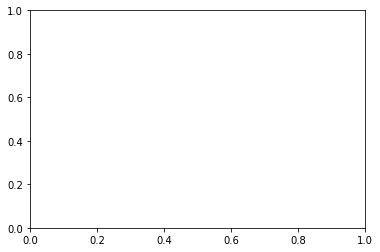

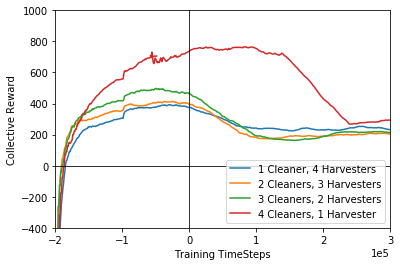

In [36]:
# plt.xlim(120000, 500000)

# a3c['Value'].plot(label = 'Pretrained Capitalism')
# com['Value'].plot(label = 'Capitalism')
# pre['Value'].plot(label = 'Communism')
# cap['Value'].plot(label = 'A3C')
plt.show()
a3c['Value'].plot(label = '1 Cleaner, 4 Harvesters')
com['Value'].plot(label = '2 Cleaners, 3 Harvesters')
pre['Value'].plot(label = '3 Cleaners, 2 Harvesters')
cap['Value'].plot(label = '4 Cleaners, 1 Harvester')

plt.ticklabel_format(axis='x',style='sci',scilimits=(0,3))

plt.axhline(0, color='black',linewidth = 0.8 )
plt.axvline(0, color='black',linewidth = 0.8 )
plt.xlim(-200000, 300000)
plt.ylim(-400, 1000)


plt.xlabel('Training TimeSteps')
plt.ylabel('Collective Reward')

plt.legend()
plt.savefig('./050-025/AgentChoice.eps', format='eps', dpi=100)
plt.show()





fig, ax = plt.subplots()


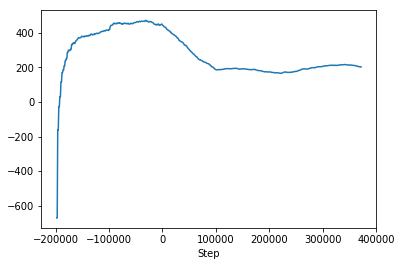

In [109]:
com['Value'].plot()
plt.show()